<a href="https://colab.research.google.com/github/takayama-rado/trado_samples/blob/main/colab_files/gislr_conformer_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Download dataset and modules

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Copy to local.
!cp drive/MyDrive/Datasets/gislr_dataset_top10.zip gislr_top10.zip

In [ ]:
!unzip -o gislr_top10.zip

Archive:  gislr_top10.zip
   creating: dataset_top10/
  inflating: dataset_top10/16069.hdf5  
  inflating: dataset_top10/18796.hdf5  
  inflating: dataset_top10/2044.hdf5  
  inflating: dataset_top10/22343.hdf5  
  inflating: dataset_top10/25571.hdf5  
  inflating: dataset_top10/26734.hdf5  
  inflating: dataset_top10/27610.hdf5  
  inflating: dataset_top10/28656.hdf5  
  inflating: dataset_top10/29302.hdf5  
  inflating: dataset_top10/30680.hdf5  
  inflating: dataset_top10/32319.hdf5  
  inflating: dataset_top10/34503.hdf5  
  inflating: dataset_top10/36257.hdf5  
  inflating: dataset_top10/37055.hdf5  
  inflating: dataset_top10/37779.hdf5  
  inflating: dataset_top10/4718.hdf5  
  inflating: dataset_top10/49445.hdf5  
  inflating: dataset_top10/53618.hdf5  
  inflating: dataset_top10/55372.hdf5  
  inflating: dataset_top10/61333.hdf5  
  inflating: dataset_top10/62590.hdf5  
  inflating: dataset_top10/LICENSE.txt  
  inflating: dataset_top10/sign_to_prediction_index_map.json  


In [ ]:
!ls dataset_top10

16069.hdf5  25571.hdf5	29302.hdf5  36257.hdf5	49445.hdf5  62590.hdf5
18796.hdf5  26734.hdf5	30680.hdf5  37055.hdf5	53618.hdf5  LICENSE.txt
2044.hdf5   27610.hdf5	32319.hdf5  37779.hdf5	55372.hdf5  sign_to_prediction_index_map.json
22343.hdf5  28656.hdf5	34503.hdf5  4718.hdf5	61333.hdf5


In [ ]:
!cat dataset_top10/sign_to_prediction_index_map.json

{
    "listen": 0,
    "look": 1,
    "shhh": 2,
    "donkey": 3,
    "mouse": 4,
    "duck": 5,
    "uncle": 6,
    "hear": 7,
    "pretend": 8,
    "cow": 9
}

In [ ]:
!cat dataset_top10/LICENSE.txt

The dataset provided by Natsuki Takayama (Takayama Research and Development Office) is licensed under CC-BY 4.0.
Author: Copyright 2024 Natsuki Takayama
Title: GISLR Top 10 dataset
Original licenser: Deaf Professional Arts Network and the Georgia Institute of Technology
Modification
- Extract 10 most frequent words.
- Packaged into HDF5 format.


In [ ]:
import h5py
with h5py.File("dataset_top10/16069.hdf5", "r") as fread:
    keys = list(fread.keys())
    print(keys)
    group = fread[keys[0]]
    print(group.keys())
    feature = group["feature"][:]
    token = group["token"][:]
    print(feature.shape)
    print(token)

['1109479272', '11121526', '1120349077', '1125456612', '1159046211', '1169128497', '1186032553', '1223803476', '1259708636', '1281972067', '129232566', '1334702305', '1340979012', '1352964057', '1370052047', '1383455381', '1431148933', '1435203624', '1437919781', '1458770030', '1462881097', '1469867050', '1474050058', '147607644', '1513539919', '1520635928', '1524297234', '153676122', '1537751003', '1542212461', '1551759770', '158232956', '1585855916', '1632709119', '1638742455', '1696757219', '177479476', '1779635114', '1791684792', '1801566440', '1831167282', '1867385690', '1880570146', '1901587887', '1910121429', '1919659282', '192873038', '1935012113', '1949620203', '195098847', '1983552660', '1989475963', '1998715062', '2007709802', '2036010239', '2036360025', '2046296211', '2082116372', '2098813002', '2109640010', '2121879330', '2141852087', '2148832702', '2152013823', '2166805079', '2176613834', '2184232774', '2213965523', '2249630763', '2256677805', '2263287955', '2263683020', 

In [ ]:
!wget https://github.com/takayama-rado/trado_samples/archive/refs/tags/v0.2.1.zip -O master.zip

--2024-08-26 12:12:17--  https://github.com/takayama-rado/trado_samples/archive/refs/tags/v0.2.1.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/takayama-rado/trado_samples/zip/refs/tags/v0.2.1 [following]
--2024-08-26 12:12:18--  https://codeload.github.com/takayama-rado/trado_samples/zip/refs/tags/v0.2.1
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [         <=>        ]  76.30M  14.4MB/s    in 6.1s    

2024-08-26 12:12:24 (12.5 MB/s) - ‘master.zip’ saved [80003316]



In [ ]:
!unzip -o master.zip -d master

Archive:  master.zip
23fc135cb7417554dafb2eea052df0791ac3e1fd
   creating: master/trado_samples-0.2.1/
  inflating: master/trado_samples-0.2.1/.gitignore  
  inflating: master/trado_samples-0.2.1/LICENSE  
  inflating: master/trado_samples-0.2.1/README.md  
   creating: master/trado_samples-0.2.1/colab_files/
 extracting: master/trado_samples-0.2.1/colab_files/.gitkeep  
  inflating: master/trado_samples-0.2.1/colab_files/exp_affine_np_einsum.ipynb  
  inflating: master/trado_samples-0.2.1/colab_files/exp_jax_static.ipynb  
  inflating: master/trado_samples-0.2.1/colab_files/exp_mpholistic_0.ipynb  
  inflating: master/trado_samples-0.2.1/colab_files/exp_mpothers_0.ipynb  
  inflating: master/trado_samples-0.2.1/colab_files/exp_track_affine_jax.ipynb  
  inflating: master/trado_samples-0.2.1/colab_files/exp_track_affine_numpy.ipynb  
  inflating: master/trado_samples-0.2.1/colab_files/exp_track_affine_tensorflow.ipynb  
  inflating: master/trado_samples-0.2.1/colab_files/exp_track_affi

In [ ]:
!mv master/trado_samples-0.2.1/src/modules_gislr .

In [ ]:
!rm -rf master master.zip gislr_top10.zip

In [ ]:
!ls

dataset_top10  drive  modules_gislr  sample_data


# 2. Load library

In [ ]:
import copy
import json
import os
import sys
from functools import partial
from inspect import signature
from pathlib import Path

# Third party's modules
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import (
    DataLoader)

from torchvision.transforms import Compose

# Local modules
sys.path.append("modules_gislr")
from modules_gislr.dataset import (
    HDF5Dataset,
    merge_padded_batch)
from modules_gislr.defines import (
    get_fullbody_landmarks,
    get_fullbody_swappairs
)
from modules_gislr.layers import (
    Identity,
    GPoolRecognitionHead,
    PositionalEncoding,
    MultiheadAttention,
    PositionwiseFeedForward,
    TransformerEncoderLayer,
    TransformerEncoder,
    TransformerEnISLR,
    MacaronNetEnISLR,
    apply_norm,
    create_norm
)
from modules_gislr.train_functions import (
    test_loop,
    val_loop,
    train_loop
)
from modules_gislr.transforms import (
    PartsBasedNormalization,
    RandomAffineTransform2D,
    RandomClip,
    RandomDropParts,
    RandomHorizontalFlip,
    RandomNoise,
    RandomTimeWarping,
    ReplaceNan,
    SelectLandmarksAndFeature,
    ToTensor
)
from modules_gislr.utils import (
    make_causal_mask,
    make_san_mask,
    select_reluwise_activation
)

# 3. Implement Conformer ISLR model (Encoder only)

### Conformer module

In [ ]:
class ConformerConvBlock(nn.Module):
    def __init__(self,
                 dim_model,
                 kernel_size,
                 norm_type="batch",
                 activation="swish",
                 padding_mode="zeros",
                 causal=False):
        super().__init__()

        assert norm_type in ["layer", "batch"]
        assert (kernel_size - 1) % 2 == 0, f"kernel_size:{kernel_size} must be the odd number."
        assert kernel_size >= 3, f"kernel_size: {kernel_size} must be larger than 3."
        self.kernel_size = kernel_size
        self.norm_type = norm_type
        self.causal = causal

        if causal:
            self.padding = (kernel_size - 1)
        else:
            self.padding = (kernel_size - 1) // 2

        self.pointwise_conv1 = nn.Conv1d(
            in_channels=dim_model,
            out_channels=dim_model * 2,  # for GLU
            kernel_size=1,
            stride=1,
            padding=0)
        self.depthwise_conv = nn.Conv1d(
            in_channels=dim_model,
            out_channels=dim_model,
            kernel_size=kernel_size,
            stride=1,
            padding=self.padding,
            groups=dim_model,  # Depthwise
            padding_mode=padding_mode,
            bias=True)

        self.norm = create_norm(norm_type, dim_model)

        self.activation = select_reluwise_activation(activation)

        self.pointwise_conv2 = nn.Conv1d(
            in_channels=dim_model,
            out_channels=dim_model,
            kernel_size=1,
            stride=1,
            padding=0)

        self.reset_parameters()

    def reset_parameters(self):
        for conv_layer in [self.pointwise_conv1,
                           self.pointwise_conv2,
                           self.depthwise_conv]:
            for name, param in conv_layer.named_parameters():
                if param.dim() == 1:
                    nn.init.constant_(param, 0.)  # bias.
                elif param.dim() in [2, 3, 4]:
                    nn.init.xavier_uniform_(param)  # linear layer
                else:
                    raise ValueError(name)

    def forward(self,
                feature):
        # `[N, T, C] -> [N, C, T] -> [N, 2C, T] -> [N, C, T]`
        feature = feature.permute([0, 2, 1]).contiguous()
        feature = self.pointwise_conv1(feature)
        feature = F.glu(feature, dim=1)

        # `[N, C, T] -> [N, C, T]`
        feature = self.depthwise_conv(feature)
        if self.causal:
            feature = feature[:, :, :-self.padding]

        # `[N, C, T]`: channel_first
        feature = apply_norm(self.norm, feature, channel_first=True)

        feature = self.activation(feature)
        feature = self.pointwise_conv2(feature)

        # `[N, C, T] -> [N, T, C]`
        feature = feature.permute([0, 2, 1]).contiguous()
        return feature

### Conformer encoder layer

In [ ]:
class ConformerEncoderLayer(nn.Module):
    def __init__(self,
                 dim_model,
                 num_heads,
                 dim_ffw,
                 dropout,
                 activation,
                 norm_type_sattn,
                 norm_type_ffw,
                 norm_eps,
                 add_bias,
                 conv_kernel_size=3,
                 conv_activation="swish",
                 conv_norm_type="layer",
                 conv_padding_mode="zeros",
                 conv_causal=False,
                 conv_layout="post"):
        super().__init__()
        assert conv_layout in ["pre", "post"]
        self.conv_layout = conv_layout

        self.fc_factor = 0.5

        # =====================================================================
        # First half PFFN.
        # =====================================================================
        self.norm_ffw1 = create_norm(norm_type_ffw, dim_model, norm_eps, add_bias)
        self.ffw1 = PositionwiseFeedForward(
            dim_model=dim_model,
            dim_ffw=dim_ffw,
            dropout=dropout,
            activation=activation,
            add_bias=add_bias)
        # =====================================================================
        # MHA.
        # =====================================================================
        self.norm_sattn = create_norm(norm_type_sattn, dim_model, norm_eps, add_bias)
        self.self_attn = MultiheadAttention(
            key_dim=dim_model,
            query_dim=dim_model,
            att_dim=dim_model,
            out_dim=dim_model,
            num_heads=num_heads,
            dropout=dropout,
            add_bias=add_bias)
        # =====================================================================
        # Conv module.
        # =====================================================================
        self.norm_conv = create_norm(conv_norm_type, dim_model, norm_eps, add_bias)
        self.conv = ConformerConvBlock(
            dim_model=dim_model,
            kernel_size=conv_kernel_size,
            activation=conv_activation,
            norm_type=conv_norm_type,
            padding_mode=conv_padding_mode,
            causal=conv_causal)

        # =====================================================================
        # Second half PFFN.
        # =====================================================================
        self.norm_ffw2 = create_norm(norm_type_ffw, dim_model, norm_eps, add_bias)
        self.ffw2 = PositionwiseFeedForward(
            dim_model=dim_model,
            dim_ffw=dim_ffw,
            dropout=dropout,
            activation=activation,
            add_bias=add_bias)

        self.dropout = nn.Dropout(p=dropout)

        # To store attention weights.
        self.attw = None

    def _forward_preconv(self, feature, san_mask):
        #################################################
        # First half PFFN.
        #################################################
        # `[N, qlen, dim_model]`
        residual = feature
        feature = apply_norm(self.norm_ffw1, feature)
        feature = self.ffw1(feature)
        feature = self.fc_factor * self.dropout(feature) + residual

        #################################################
        # Conv.
        #################################################
        # `[N, qlen, dim_model]`
        residual = feature
        feature = apply_norm(self.norm_conv, feature)
        feature = self.conv(feature)
        feature = self.dropout(feature) + residual

        #################################################
        # MHA.
        #################################################
        # `[N, qlen, dim_model]`
        residual = feature
        feature = apply_norm(self.norm_sattn, feature)
        feature, self.attw = self.self_attn(
            key=feature,
            value=feature,
            query=feature,
            mask=san_mask)
        feature = self.dropout(feature) + residual

        #################################################
        # Second half PFFN.
        #################################################
        # `[N, qlen, dim_model]`
        residual = feature
        feature = apply_norm(self.norm_ffw2, feature)
        feature = self.ffw2(feature)
        feature = self.fc_factor * self.dropout(feature) + residual
        return feature

    def _forward_postconv(self, feature, san_mask):
        #################################################
        # First half PFFN.
        #################################################
        # `[N, qlen, dim_model]`
        residual = feature
        feature = apply_norm(self.norm_ffw1, feature)
        feature = self.ffw1(feature)
        feature = self.fc_factor * self.dropout(feature) + residual

        #################################################
        # MHA.
        #################################################
        # `[N, qlen, dim_model]`
        residual = feature
        feature = apply_norm(self.norm_sattn, feature)
        feature, self.attw = self.self_attn(
            key=feature,
            value=feature,
            query=feature,
            mask=san_mask)
        feature = self.dropout(feature) + residual

        #################################################
        # Conv.
        #################################################
        # `[N, qlen, dim_model]`
        residual = feature
        feature = apply_norm(self.norm_conv, feature)
        feature = self.conv(feature)
        feature = self.dropout(feature) + residual

        #################################################
        # Second half PFFN.
        #################################################
        # `[N, qlen, dim_model]`
        residual = feature
        feature = apply_norm(self.norm_ffw2, feature)
        feature = self.ffw2(feature)
        feature = self.fc_factor * self.dropout(feature) + residual
        return feature

    def forward(self,
                feature,
                causal_mask=None,
                src_key_padding_mask=None):
        bsize, qlen = feature.shape[:2]
        if src_key_padding_mask is not None:
            san_mask = make_san_mask(src_key_padding_mask, causal_mask)
        elif causal_mask is not None:
            san_mask = causal_mask
        else:
            san_mask = None

        if self.conv_layout == "pre":
            feature = self._forward_preconv(feature, san_mask)
        else:
            feature = self._forward_postconv(feature, san_mask)
        return feature

### ISLR model

In [ ]:
class ConformerEnISLR(nn.Module):
    def __init__(self,
                 in_channels,
                 inter_channels,
                 out_channels,
                 activation="relu",
                 pooling_type="none",
                 tren_num_layers=1,
                 tren_num_heads=1,
                 tren_dim_ffw=256,
                 tren_dropout_pe=0.1,
                 tren_dropout=0.1,
                 tren_norm_type_sattn="layer",
                 tren_norm_type_ffw="layer",
                 tren_norm_type_tail="layer",
                 tren_norm_eps=1e-5,
                 tren_add_bias=True,
                 tren_add_tailnorm=True,
                 conv_kernel_size=3,
                 conv_activation="swish",
                 conv_norm_type="layer",
                 conv_padding_mode="zeros",
                 conv_causal=False,
                 conv_layout="post"):
        super().__init__()

        # Feature extraction.
        self.linear = nn.Linear(in_channels, inter_channels)
        self.activation = select_reluwise_activation(activation)

        if pooling_type == "none":
            self.pooling = Identity()
        elif pooling_type == "average":
            self.pooling = nn.AvgPool2d(
                kernel_size=[2, 1],
                stride=[2, 1],
                padding=0)
        elif pooling_type == "max":
            self.pooling = nn.MaxPool2d(
                kernel_size=[2, 1],
                stride=[2, 1],
                padding=0)

        # Transformer-Encoder.
        enlayer = ConformerEncoderLayer(
            dim_model=inter_channels,
            num_heads=tren_num_heads,
            dim_ffw=tren_dim_ffw,
            dropout=tren_dropout,
            activation=activation,
            norm_type_sattn=tren_norm_type_sattn,
            norm_type_ffw=tren_norm_type_ffw,
            norm_eps=tren_norm_eps,
            add_bias=tren_add_bias,
            conv_kernel_size=conv_kernel_size,
            conv_activation=conv_activation,
            conv_norm_type=conv_norm_type,
            conv_padding_mode=conv_padding_mode,
            conv_causal=conv_causal,
            conv_layout=conv_layout)
        self.tr_encoder = TransformerEncoder(
            encoder_layer=enlayer,
            num_layers=tren_num_layers,
            dim_model=inter_channels,
            dropout_pe=tren_dropout_pe,
            norm_type_tail=tren_norm_type_tail,
            norm_eps=tren_norm_eps,
            norm_first=True,  # Fixed for MacaronNet.
            add_bias=tren_add_bias,
            add_tailnorm=tren_add_tailnorm)

        self.head = GPoolRecognitionHead(inter_channels, out_channels)

    def forward(self,
                feature,
                feature_causal_mask=None,
                feature_pad_mask=None):
        # Feature extraction.
        # `[N, C, T, J] -> [N, T, C, J] -> [N, T, C*J] -> [N, T, C']`
        N, C, T, J = feature.shape
        feature = feature.permute([0, 2, 1, 3])
        feature = feature.reshape(N, T, -1)

        feature = self.linear(feature)
        if torch.isnan(feature).any():
            raise ValueError()
        feature = self.activation(feature)
        if torch.isnan(feature).any():
            raise ValueError()

        # Apply pooling.
        feature = self.pooling(feature)
        if feature_pad_mask is not None:
            # Cast to apply pooling.
            feature_pad_mask = feature_pad_mask.to(feature.dtype)
            feature_pad_mask = self.pooling(feature_pad_mask.unsqueeze(-1)).squeeze(-1)
            # Binarization.
            # This removes averaged signals with padding.
            feature_pad_mask = feature_pad_mask > 0.5
            if feature_causal_mask is not None:
                feature_causal_mask = make_causal_mask(feature_pad_mask)

        feature = self.tr_encoder(
            feature=feature,
            causal_mask=feature_causal_mask,
            src_key_padding_mask=feature_pad_mask)
        if torch.isnan(feature).any():
            raise ValueError()

        # `[N, T, C] -> [N, C, T]`
        logit = self.head(feature.permute([0, 2, 1]), feature_pad_mask)
        if torch.isnan(feature).any():
            raise ValueError()
        return logit

## Sanity check

In [ ]:
# Access check.
dataset_dir = Path("dataset_top10")
files = list(dataset_dir.iterdir())
dictionary = [fin for fin in files if ".json" in fin.name][0]
hdf5_files = [fin for fin in files if ".hdf5" in fin.name]

print(dictionary)
print(hdf5_files)

dataset_top10/sign_to_prediction_index_map.json
[PosixPath('dataset_top10/30680.hdf5'), PosixPath('dataset_top10/4718.hdf5'), PosixPath('dataset_top10/61333.hdf5'), PosixPath('dataset_top10/37055.hdf5'), PosixPath('dataset_top10/28656.hdf5'), PosixPath('dataset_top10/22343.hdf5'), PosixPath('dataset_top10/53618.hdf5'), PosixPath('dataset_top10/27610.hdf5'), PosixPath('dataset_top10/34503.hdf5'), PosixPath('dataset_top10/29302.hdf5'), PosixPath('dataset_top10/37779.hdf5'), PosixPath('dataset_top10/25571.hdf5'), PosixPath('dataset_top10/16069.hdf5'), PosixPath('dataset_top10/36257.hdf5'), PosixPath('dataset_top10/62590.hdf5'), PosixPath('dataset_top10/55372.hdf5'), PosixPath('dataset_top10/18796.hdf5'), PosixPath('dataset_top10/32319.hdf5'), PosixPath('dataset_top10/26734.hdf5'), PosixPath('dataset_top10/49445.hdf5'), PosixPath('dataset_top10/2044.hdf5')]


In [ ]:
# Load dictionary.
with open(dictionary, "r") as fread:
    key2token = json.load(fread)

VOCAB = len(key2token)

In [ ]:
_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]
swap_pairs, _ = get_fullbody_swappairs()

trans_select_feature = SelectLandmarksAndFeature(landmarks=use_landmarks, features=use_features)
trans_repnan = ReplaceNan()
trans_norm = PartsBasedNormalization(align_mode="framewise", scale_mode="unique")

trans_hflip = RandomHorizontalFlip(
    apply_ratio=0.5,
    num_joints=len(use_landmarks),
    swap_pairs=swap_pairs,
    flip_center=0.5,
    feature_dim=len(use_features),
    include_conf=False
)
trans_saffine = RandomAffineTransform2D(
    apply_ratio=0.5,
    center_joints=[0, 2],
    target_joints=np.arange(0, len(use_landmarks)),
    trans_range=[-0.1, 0.1],
    scale_range=[1.0/1.5, 1.5],
    rot_range=[-30, 30],
    skew_range=[-30, 30]
)
trans_snoise = RandomNoise(
    apply_ratio=0.5,
    scale_range=[1e-3, 1e-2],
    scale_unit="asis",
    noise_type="uniform",
    target_joints=np.arange(0, len(use_landmarks)),
    feature_dim=len(use_features),
    include_conf=False
)
trans_clip =  RandomClip(
    apply_ratio=0.5,
    clip_range=[0.4, 0.6],
    min_apply_size=10
)
trans_twarp = RandomTimeWarping(
    apply_ratio=0.5,
    scale_range=[0.5, 2.0],
    min_apply_size=10
)
trans_drop = RandomDropParts(apply_ratio=0.5)

pre_transforms = Compose([trans_select_feature,
                          trans_repnan])

train_transforms = Compose([
    trans_hflip,
    trans_saffine,
    trans_snoise,
    trans_norm,
    trans_clip,
    trans_twarp,
    trans_drop,
    ToTensor()
])
val_transforms = Compose([trans_norm, ToTensor()])
test_transforms = Compose([trans_norm, ToTensor()])

In [ ]:
batch_size = 2
feature_shape = (len(use_features), -1, len(use_landmarks))
token_shape = (1,)
merge_fn = partial(merge_padded_batch,
                   feature_shape=feature_shape,
                   token_shape=token_shape,
                   feature_padding_val=0.0,
                   token_padding_val=0)

dataset = HDF5Dataset(hdf5_files, pre_transforms=pre_transforms, transforms=train_transforms)

dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=merge_fn)
try:
    data = next(iter(dataloader))
    feature_origin = data["feature"]

    print(feature_origin.shape)
except Exception as inst:
    print(inst)

torch.Size([2, 2, 6, 130])


In [ ]:
# Define model.
# in_channels: J * C (130*2=260)
#   J: use_landmarks (130)
#   C: use_channels (2)
# out_channels: 10
in_channels = len(use_landmarks) * len(use_features)
inter_channels = 64
out_channels = VOCAB
activation = "relu"
pooling_type = "none"
tren_num_layers = 2
tren_num_heads = 2
tren_dim_ffw = 256
tren_dropout_pe = 0.1
tren_dropout = 0.1
tren_norm_type_sattn = "layer"
tren_norm_type_ffw = "layer"
tren_norm_type_tail = "layer"
tren_norm_eps = 1e-5
tren_norm_first = True  # For Transformer.
tren_add_bias = True
tren_add_tailnorm = True
conv_kernel_size = 3
conv_activation = "swish"
conv_norm_type = "batch"
conv_padding_mode = "zeros"
conv_causal = False
conv_layout = "post"

model = ConformerEnISLR(in_channels=in_channels,
                        inter_channels=inter_channels,
                        out_channels=out_channels,
                        activation=activation,
                        pooling_type=pooling_type,
                        tren_num_layers=tren_num_layers,
                        tren_num_heads=tren_num_heads,
                        tren_dim_ffw=tren_dim_ffw,
                        tren_dropout_pe=tren_dropout_pe,
                        tren_dropout=tren_dropout,
                        tren_norm_type_sattn=tren_norm_type_sattn,
                        tren_norm_type_ffw=tren_norm_type_ffw,
                        tren_norm_type_tail=tren_norm_type_tail,
                        tren_norm_eps=tren_norm_eps,
                        tren_add_bias=tren_add_bias,
                        tren_add_tailnorm=tren_add_tailnorm,
                        conv_kernel_size=conv_kernel_size,
                        conv_activation=conv_activation,
                        conv_norm_type=conv_norm_type,
                        conv_padding_mode=conv_padding_mode,
                        conv_causal=conv_causal,
                        conv_layout=conv_layout)
print(model)

# Sanity check.
logit = model(feature_origin)
print(logit.shape)
attw0 = model.tr_encoder.layers[0].attw.detach().cpu().numpy()
attw1 = model.tr_encoder.layers[0].attw.detach().cpu().numpy()
print(attw0.shape, attw1.shape)

ConformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (pooling): Identity()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x ConformerEncoderLayer(
        (norm_ffw1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (ffw1): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (norm_sattn): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
   

# 4. Train and evaluation

## 4.1 Set common parameters.

In [ ]:
# Set common parameters.
batch_size = 32
load_into_ram = True
test_pid = 16069
num_workers = os.cpu_count()
print(f"Using {num_workers} cores for data loading.")
lr = 3e-4
label_smoothing = 0.1

epochs = 50
eval_every_n_epochs = 1
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} for computation.")

train_hdf5files = [fin for fin in hdf5_files if str(test_pid) not in fin.name]
val_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]
test_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]

_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]

Using 2 cores for data loading.
Using cuda for computation.


In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(train_hdf5files, pre_transforms=pre_transforms,
    transforms=train_transforms, load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(val_hdf5files, pre_transforms=pre_transforms,
    transforms=val_transforms, load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(test_hdf5files, pre_transforms=pre_transforms,
    transforms=test_transforms, load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

## 4.2 Run training process

### Conformer

In [ ]:
model_conformer = ConformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    pooling_type=pooling_type,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_norm_type_sattn=tren_norm_type_sattn,
    tren_norm_type_ffw=tren_norm_type_ffw,
    tren_norm_type_tail=tren_norm_type_tail,
    tren_norm_eps=tren_norm_eps,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm,
    conv_kernel_size=conv_kernel_size,
    conv_activation=conv_activation,
    conv_norm_type=conv_norm_type,
    conv_padding_mode=conv_padding_mode,
    conv_causal=conv_causal,
    conv_layout=conv_layout)
print(model_conformer)

loss_fn = nn.CrossEntropyLoss(reduction="mean", label_smoothing=label_smoothing)
optimizer = torch.optim.Adam(model_conformer.parameters(), lr=lr)

ConformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (pooling): Identity()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x ConformerEncoderLayer(
        (norm_ffw1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (ffw1): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (norm_sattn): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
   

In [ ]:
# Train, validation, and evaluation.
model_conformer.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_conformer, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_conformer, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_conformer, device)
        test_accs.append(acc)
train_losses_conformer = np.array(train_losses)
val_losses_conformer = np.array(val_losses)
test_accs_conformer = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_conformer.min()} at {np.argmin(val_losses_conformer)+1} epoch.")
print(f"Maximum accuracy:{test_accs_conformer.max()} at {np.argmax(test_accs_conformer)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.932725 [    0/ 3881]
loss:2.113496 [ 3200/ 3881]
Done. Time:12.763928049000015
Training performance: 
 Avg loss:2.268183

Start validation.
Done. Time:0.4053079569999909
Validation performance: 
 Avg loss:1.955625

Start evaluation.
Done. Time:2.0531354579999856
Test performance: 
 Accuracy:27.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.963959 [    0/ 3881]
loss:1.937137 [ 3200/ 3881]
Done. Time:11.042819639000015
Training performance: 
 Avg loss:1.899925

Start validation.
Done. Time:0.3858394350000083
Validation performance: 
 Avg loss:1.919637

Start evaluation.
Done. Time:1.7013048480000066
Test performance: 
 Accuracy:38.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.562740 [    0/ 3881]
loss:1.485366 [ 3200/ 3881]
Don

### MacaronNet

In [ ]:
model_macaron = MacaronNetEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    pooling_type=pooling_type,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_norm_type_sattn=tren_norm_type_sattn,
    tren_norm_type_ffw=tren_norm_type_ffw,
    tren_norm_type_tail=tren_norm_type_tail,
    tren_norm_eps=tren_norm_eps,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_macaron)

loss_fn = nn.CrossEntropyLoss(reduction="mean", label_smoothing=label_smoothing)
optimizer = torch.optim.Adam(model_macaron.parameters(), lr=lr)

MacaronNetEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (pooling): Identity()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x MacaronNetEncoderLayer(
        (norm_ffw1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (ffw1): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (norm_sattn): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
 

In [ ]:
# Train, validation, and evaluation.
model_macaron.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_macaron, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_macaron, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_macaron, device)
        test_accs.append(acc)
train_losses_macaron = np.array(train_losses)
val_losses_macaron = np.array(val_losses)
test_accs_macaron = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_macaron.min()} at {np.argmin(val_losses_macaron)+1} epoch.")
print(f"Maximum accuracy:{test_accs_macaron.max()} at {np.argmax(test_accs_macaron)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.997093 [    0/ 3881]
loss:2.221720 [ 3200/ 3881]
Done. Time:9.771509093999953
Training performance: 
 Avg loss:2.307267

Start validation.
Done. Time:0.38306323599999814
Validation performance: 
 Avg loss:2.060316

Start evaluation.
Done. Time:1.4551132789999883
Test performance: 
 Accuracy:29.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:2.161325 [    0/ 3881]
loss:1.541470 [ 3200/ 3881]
Done. Time:10.497368387999927
Training performance: 
 Avg loss:1.935904

Start validation.
Done. Time:0.4012624570000298
Validation performance: 
 Avg loss:1.726491

Start evaluation.
Done. Time:1.4604183430000148
Test performance: 
 Accuracy:44.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.818998 [    0/ 3881]
loss:1.876757 [ 3200/ 3881]
Don

### Transformer

In [ ]:
model_trans = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    pooling_type=pooling_type,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_norm_type_sattn=tren_norm_type_sattn,
    tren_norm_type_ffw=tren_norm_type_ffw,
    tren_norm_type_tail=tren_norm_type_tail,
    tren_norm_eps=tren_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_trans)

loss_fn = nn.CrossEntropyLoss(reduction="mean", label_smoothing=label_smoothing)
optimizer = torch.optim.Adam(model_trans.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (pooling): Identity()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (norm_sattn): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p

In [ ]:
# Train, validation, and evaluation.
model_trans.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_trans, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_trans, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_trans, device)
        test_accs.append(acc)
train_losses_trans = np.array(train_losses)
val_losses_trans = np.array(val_losses)
test_accs_trans = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_trans.min()} at {np.argmin(val_losses_trans)+1} epoch.")
print(f"Maximum accuracy:{test_accs_trans.max()} at {np.argmax(test_accs_trans)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:4.402450 [    0/ 3881]
loss:2.115038 [ 3200/ 3881]
Done. Time:8.38699408299999
Training performance: 
 Avg loss:2.288270

Start validation.
Done. Time:0.4067367610000474
Validation performance: 
 Avg loss:2.106523

Start evaluation.
Done. Time:1.3630606099998204
Test performance: 
 Accuracy:29.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:2.219019 [    0/ 3881]
loss:1.748654 [ 3200/ 3881]
Done. Time:10.424464245000081
Training performance: 
 Avg loss:1.919343

Start validation.
Done. Time:0.38672636199999033
Validation performance: 
 Avg loss:1.864834

Start evaluation.
Done. Time:1.3686024620001263
Test performance: 
 Accuracy:41.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.706576 [    0/ 3881]
loss:1.567125 [ 3200/ 3881]
Done

### Plort result
#### Recognition performance

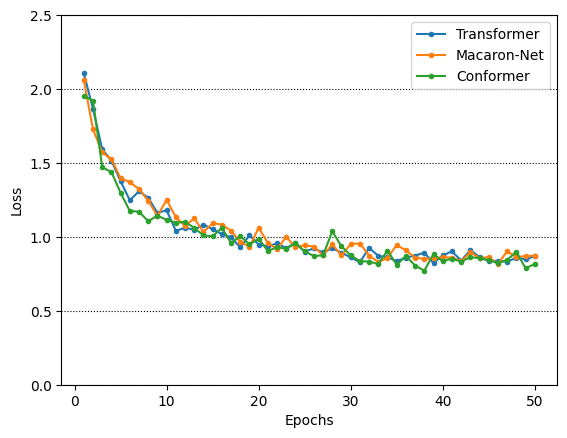

In [ ]:
import matplotlib.pyplot as plt

plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(val_losses_trans)+1)
plt.plot(xs, val_losses_trans, label="Transformer", marker=".")
plt.plot(xs, val_losses_macaron, label="Macaron-Net", marker=".")
plt.plot(xs, val_losses_conformer, label="Conformer", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.0, 2.5])
plt.legend()
plt.show()

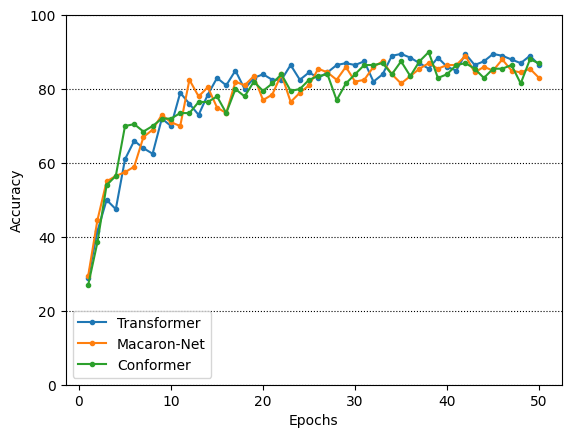

In [ ]:
plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(test_accs_trans)+1)
plt.plot(xs, test_accs_trans, label="Transformer", marker=".")
plt.plot(xs, test_accs_macaron, label="Macaron-Net", marker=".")
plt.plot(xs, test_accs_conformer, label="Conformer", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.0, 100.0])
plt.legend()
plt.show()